# Sentence Generation on Quantum Computers

In this workshop we're going to generate some sentences about food, using the techniques in the paper "Quantum Natural Language Generation on Near-Term devices". 

The first part of this notebook is based on the following example from Lambeq, a python library specifically created for QNLP tasks: https://cqcl.github.io/lambeq/examples/quantum_pipeline.html. We encourage you to explore Lambeq more after this workshop, it has lots of neat features!

## Installing the dependencies
The first thing we need to do is make sure we have the necessary python packages installed.

In [1]:
! pip install lambeq
! pip install pytket-qiskit
! pip install nltk

import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")
os.environ["TOKENIZERS_PARALLELISM"] = "false"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 31.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 2.4 MB/

## Step 1: Read in the data and create diagrams

To begin with, we are going to read in the 130 sentences stored in the dataset directory. Each senetence has been assigned As is standard in machine learning, these sentences are split into training, validation (dev), and development datasets. Don't worry if you don't know what this terminology means, it won't be terribly important for what follows. If you want more information you can checkout: https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets#Validation_data_set

Now it's time for your first assignment in this workshop:
### Assigment 1: Fix the code below so that the test dataset is loaded into the appropriate variables.


In [3]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, train_data = read_data('datasets/mc_train_data.txt')
dev_labels, dev_data = read_data('datasets/mc_dev_data.txt')
test_labels, test_data = read_data('datasets/mc_test_data.txt')

## Step 2: Parsing and Diagram creation

We now want to turn each sentence in the dataset into a parameterised quantum circuit which encodes it's meaning. We begin doing this by parsing the sentences and generating their corresponding DisCoCat diagrams.

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


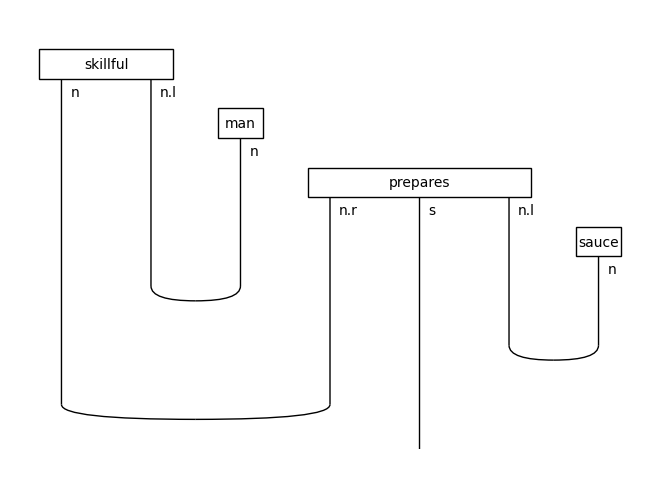

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


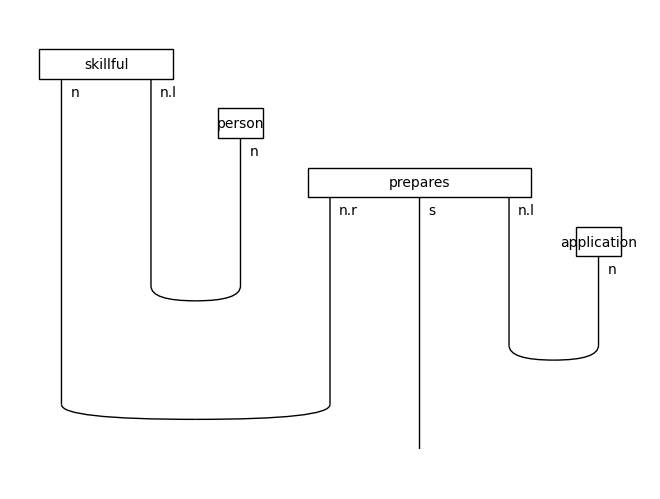

In [4]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_train_diagrams[0].draw()
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_dev_diagrams[0].draw()



### Assignment 2: Complete the code below in order to generate diagrams for the test_dataset. Then draw one of these diagrams. 

In [ ]:
raw_test_diagrams = ?????????
?????

## Step 3: Diagram Rewriting

Now it's time for the optional diagram rewriting step. We are going to remove all the cups in the diagram (Run the cell below to see what we mean). This is a helpful rewrite since it means that the quantum circuits we eventually end up with in the end can be implemented with less qubits. 

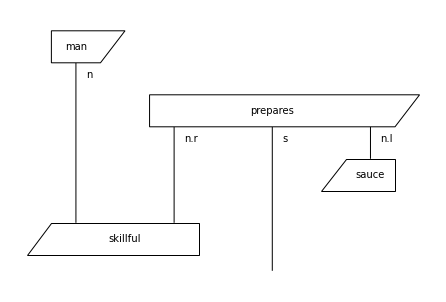

In [ ]:
from lambeq import remove_cups

print("Before removing cups")
raw_train_diagrams[0].draw()
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
print("After removing cups")
train_diagrams[0].draw()

dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
dev_diagrams[0].draw()



### Assignment 3: Remove the cups from the test_diagrams and draw one of the new diagrams.

In [ ]:
test_diagrams = ????
????



## Step 4: Create Parameterised Quantum Circuit 

We are finally ready to create our parameterised quantum circuit. In order to do this we will use lambeqs IQPAnsatz (See https://cqcl.github.io/lambeq/tutorials/parameterise.html for more info). 

In [ ]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
train_circuits[0].draw(figsize=(9, 12))
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]

### Assignment 4: Use the ansatz function to transform the testing diagrams into parameterised quantum circuits. Draw one of these quantum circuits.

In [ ]:
test_circuits = ????
????

Traceback (most recent call last):
  File /opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py:105 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Input In [3]
    test_circuits = ????
                    ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.


# Step 5: Choosing a backend
We are now going to choose a backend on which our quantum circuits is going to be run. In this workshop we are going to use a classical simulator (a classical computer which simulates the bahaviour of a real quantum computer) to run our circuits. 

The IBM Quantum Experience does allow us to run this code on real quantum computers as well. However, given that access to quantum computers is currently in high demand this won't be feasible to do during the workshop, since we'd spent the whole time queuing and waiting for our circuits to be executed. So you have some homework:

### Homework: Read through the pytket and qiskit documentation and try changing the code to use a real quantum computer as a backend.

In [ ]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits+dev_circuits+test_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

# Step 6: Creating the quantum sentence classifier. 

The code below trains our quantum sentence classifier. Since the training can take a few minutes we could alternatively work with a pre-trained model which you can load from the `checkpoint.pickle` file.

In [ ]:
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

from lambeq import QuantumTrainer, SPSAOptimizer

EPOCHS = 120
BATCH_SIZE = 30

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)
trainer.fit(train_dataset, val_dataset, logging_step=1)

In [ ]:
# model = TketModel.from_checkpoint('checkpoint.pickle', backend_config=backend_config)

# Step 7: It's finally time for sentence generation!


We are now ready to implement an algorithm that generates a sentence about cooking. This will be achieved by searching through the space of all possible sentences in order to find and output a sentence about cooking. 

As discussed in the presentation the task above is called an optimisation problem. There are many different search strategies that can be employed to solve this task. Here we will employ the simplest possible strategy: Random guessing. 

Before we implement the random guessing algorithm we describe two helper functions. The details of how these are implemented are not important, but their input output behaviour is:

1. The `_create_sentence_searc_space()` function takes in no inputs and returns a list of all the sentences in our search space. 
2. The `_measure_quantum_circuit_for_sentence(sentence)` function takes in a sentence in the search space and measures the corresponding paraemterised quantum circuit, returning an array of two numbers between 0 and 1, which add up to 1. The first number represents the probability that the given sentence is about food, while the second number represents the probability that it is about IT.

In [ ]:
from nltk import CFG
from nltk.parse.generate import generate

def _create_sentence_search_space():
    MC_GRAMMAR = """
      S -> NP VP
      NP -> N
      VP -> V NP
      NP -> A N
      A -> 'skillful' | 'tasty' | 'useful'
      N -> 'application' | 'dinner' | 'man' | 'meal' | 'person' | 'program' | 'sauce' | 'software' | 'woman'
      V -> 'bakes' | 'cooks' | 'debugs' | 'prepares' | 'runs'
      """

    VOCAB = ['debugs', 'dinner', 'person', 'useful', 'runs', 'program', 'bakes', 'cooks', 'skillful', 'woman', 'prepares', 'application', 'man', 'software', 'sauce', 'meal', 'tasty']

    subjects = ["man", "woman", "person"]
    objects = ["sauce", "meal", "application", "software", "dinner", "program"]

    GRAMMAR = CFG.fromstring(MC_GRAMMAR)
    SENTENCES = list(generate(GRAMMAR))

    def filter_sentence(sentence):
        # Make sure no word appears more than once:
        if not len(set(sentence)) == len(sentence):
            return False

        # Make sure subject appears before object:
        try:
            subject_position = next(i for i,v in enumerate(sentence) if v in subjects)
            object_position = next(i for i,v in enumerate(sentence) if v in objects)
        except:
            return False
        return subject_position < object_position

    SENTENCES = list(filter(filter_sentence, SENTENCES))
    return SENTENCES

def _measure_quantum_circuit_for_sentence(sentence):
    parser = BobcatParser(verbose='text')
    diagram = parser.sentences2diagrams([sentence])
    circ = [ansatz(d) for d in diagram]

    return model.get_diagram_output(circ)[0]

### Generation assignment: Complete the  randomly_generate_sentence_with_topic function below. It's behaviour should be to continously guess a random sentence from the search space and then check to see if this is with high probability a sentence about the correct topic. If such a sentence is found, it should be returned. 

In [ ]:
import random
SENTENCES = ????
def randomly_generate_sentence_with_topic(topic):
    i = 0
    while i < 100:
        i += 1
        print(i)
        sentence = " ".join(random.choice(SENTENCES))
        print(sentence)
        prediction = ?????
        print(prediction)
        if topic == "Food" and prediction[0] > 0.9:
            return i, sentence
            break
        elif topic == "IT" and prediction[1] > 0.9:
            return i, sentence
            break
    return 100, "Max iterations reached"

Let's now run the function to generate a sentence about food

In [ ]:
randomly_generate_sentence_with_topic("Food")

# Bonus Question! (Difficult)
Of course, random guessing is not the most efficient way of navigating through the search space of sentences! 
In fact we already saw a cleverer way of performing this task in the presentation. This method was based on the well known hill climbing algorithm: https://en.wikipedia.org/wiki/Hill_climbing
Your task is to read about hill climbing and use your newfound knowledge to implement the sentence generation algorithm we covered in the presentation. 